In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pickle
import cv2
%matplotlib inline
from google.colab.patches import cv2_imshow

In [ ]:
#Load all the models
haar = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
mean = pickle.load(open('/content/drive/MyDrive/mean_preprocess.pickle','rb'))
model_svm = pickle.load(open('/content/drive/MyDrive/model_svm.pickle','rb'))
model_pca = pickle.load(open('/content/drive/MyDrive/pca_50.pickle','rb'))
print('All the files are loaded sucessfully')

All the files are loaded sucessfully


In [ ]:
mean.shape

(10000,)

In [ ]:
gender_pre = ['Male', 'Female']
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
#_model
def pipeline_model(img,color='rgb'):
    if color == 'bgr':
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # crop face using harr cascade classifier
    faces = haar.detectMultiScale(gray,1.5,3)
    for x,y,w,h in faces:

        #Drawing rectangle
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            #Crop image
        roi = gray[y:y+h,x:x+w]

        #step-4 Normalization (0-1)
        roi = roi / 255.0

        #step-5 resize image(100,100)
        if roi.shape[1] > 100:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_AREA) #Shrink
        else:
            roi_resize = cv2.resize(roi, (100,100), cv2.INTER_CUBIC) #Enlarge

        #step-6 Flattening(1*10000)
        roi_reshape = roi_resize.reshape(1,10000) # 1*10,000

        #step-7 subtract with mean
        roi_mean = roi_reshape - mean

        #step-8 get eigen image
        eigen_image = model_pca.transform(roi_mean)
        #step-9 apply ml algorithm (SVM)
        results = model_svm.predict_proba(eigen_image)[0]

        #step-10
        predict = results.argmax() # 0 or 1
        score = results[predict]

        #step-11
        text = "%s : %0.2f"%(gender_pre[predict],score)
        cv2.putText(img,text,(x,y),font,1,(0,255,0),2)
    return img



In [ ]:
from PIL import Image

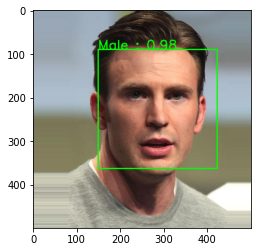

In [ ]:
test_data_path = '/content/male.jpg'
color = 'bgr'
# read image
img = Image.open(test_data_path) #rgb
# convert into array
img = np.array(img)
# pass to the pipeline model
img = pipeline_model(img)
plt.imshow(img)

**Apply pipeline model to vedio**

In [ ]:
#cap = cv2.VideoCapture('video.mp4')

while True:
	ret,frame = cap.read() #bgr

	if ret == False:
		break

#	frame = pipeline_model(frame,color='bgr')

	cv2_imshow(frame)
	if cv2.waitKey(10) == ord('s'): #Press s to exit --esc key==27
		break
cv2.destroyAllWindows()
cap.release()